<a href="https://colab.research.google.com/github/harshit0209/NeuralNetwroks/blob/master/Mist-number(own).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
tf.__version__
mnist=tf.keras.datasets.mnist #28x28 images of hand written digits 0-9
(x_train, y_train),(x_test,y_test)=mnist.load_data()
#Normalizing Matrix as it makes it faster, eaiser for model to deal with values between 0 and 1
#The images in data set have a value 0- 255 that represent depth of color so below we have conterted the value between 0 to 1
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

model=tf.keras.models.Sequential()#most common model
model.add(tf.keras.layers.Flatten())#for making a linear structure form 2d array//numpy could also be used for this
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)
 

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1128 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0550 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0335 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [23]:
#loss and accuracy
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.9562
0.1434568464756012 0.9562000036239624


Saving the model(with weights) so that next time directly neural network can use

In [0]:
model.save('epic_num_reader.h5')

Making a new model from file 

In [0]:
new_model=tf.keras.models.load_model('epic_num_reader.h5')


Prediccting with new_model by passing it a list x_test. It gives output as list of lists that show probability of being different values. We will use **argmax** to get most probable outcome and show it.

In [35]:
p=new_model.predict(x_test)
print (p)

[[1.73874715e-16 1.76935374e-14 2.72635748e-14 ... 1.00000000e+00
  1.72821413e-15 2.49168255e-11]
 [1.18788366e-21 9.84296644e-10 1.00000000e+00 ... 1.53087128e-14
  1.62138774e-18 1.76070220e-21]
 [1.06379995e-10 9.99999046e-01 1.43120040e-08 ... 2.80240982e-07
  5.49272613e-07 6.04689215e-11]
 ...
 [4.39993547e-17 3.07288700e-13 1.01567989e-20 ... 1.90233831e-12
  8.84980370e-12 3.27522503e-06]
 [1.19565985e-15 5.34942281e-16 1.62326001e-19 ... 1.20566797e-14
  1.29720183e-06 1.54527931e-14]
 [1.46901642e-13 1.03507104e-14 6.24029157e-17 ... 5.72669630e-25
  7.84041563e-15 4.56130207e-16]]


In [36]:
import numpy as np
print(np.argmax(p[0]))

7


Loading Model from file

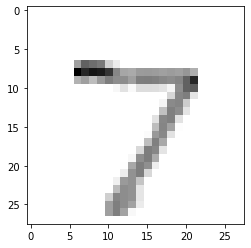

7


In [41]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
print(y_test[0])